<a href="https://colab.research.google.com/github/nadaaltalea/Diabetes-Prediction-using-Machine-Learning-Pima-Indians-Dataset-/blob/main/Pima_Indians_Diabetes_Datase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ===== Import basic libraries =====
import numpy as np
import pandas as pd

# ===== Mount Google Drive =====
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# =====  Load the dataset from Google Drive =====

file_path = "/content/drive/MyDrive/diabetes.csv"

df = pd.read_csv(file_path)

#Display 5 rows

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# ==== Basic dataset exploration ====

print("Shape (rows, columns):", df.shape)
print("\nColumn names:\n", df.columns.tolist())

print("\nData Types:\n")
print(df.dtypes)

print("\nMissing values:\n")
print(df.isnull().sum())

print("\nStatistical Summary:\n")
print(df.describe())


Shape (rows, columns): (768, 9)

Column names:
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Data Types:

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Missing values:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Statistical Summary:

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   

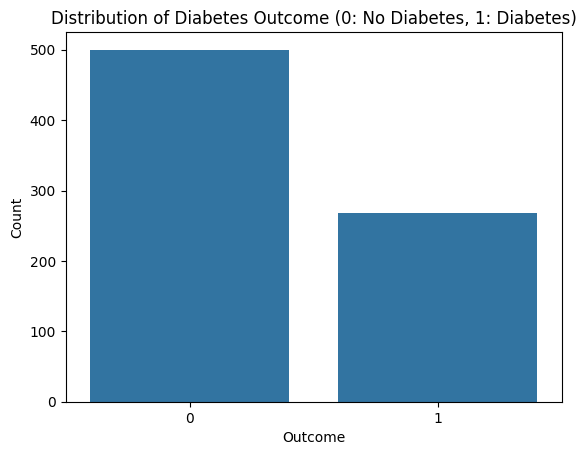

,count
Outcome,
0,500
1,268


In [5]:
# ==== Target distribution ====

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Outcome')
plt.title("Distribution of Diabetes Outcome (0: No Diabetes, 1: Diabetes)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

df['Outcome'].value_counts()


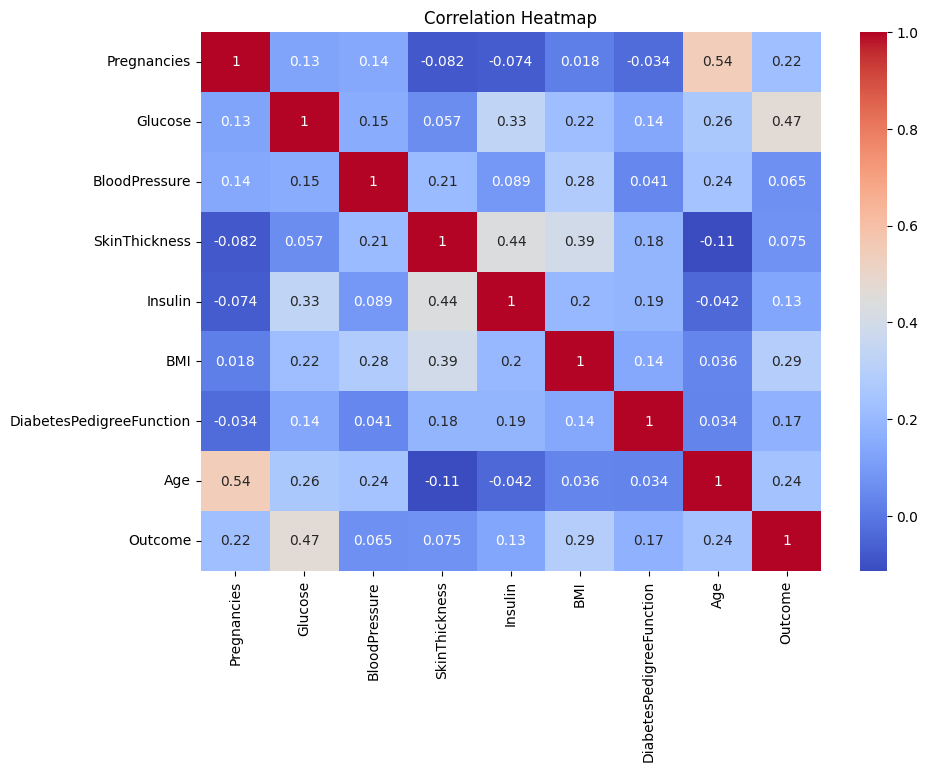

In [6]:
# ==== Correlation Heatmap ====


plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


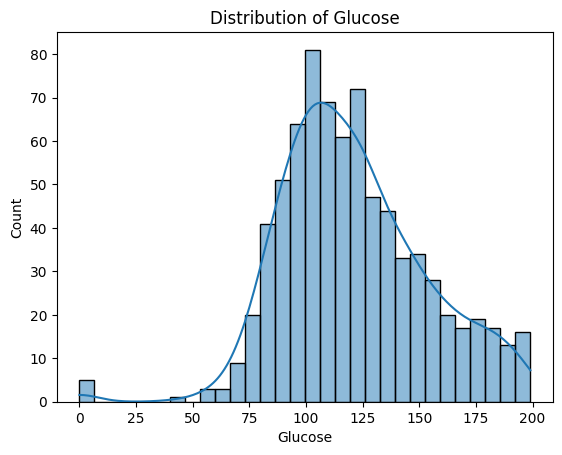

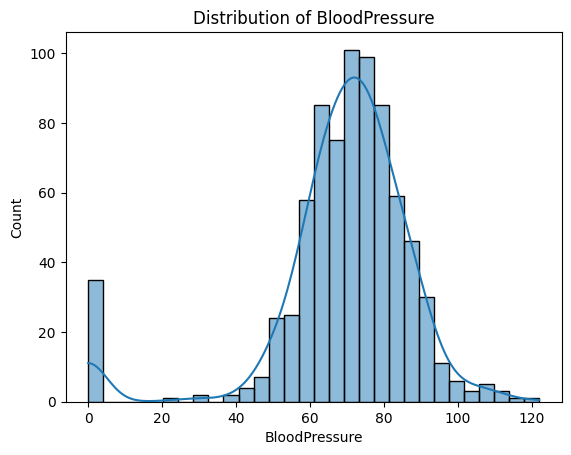

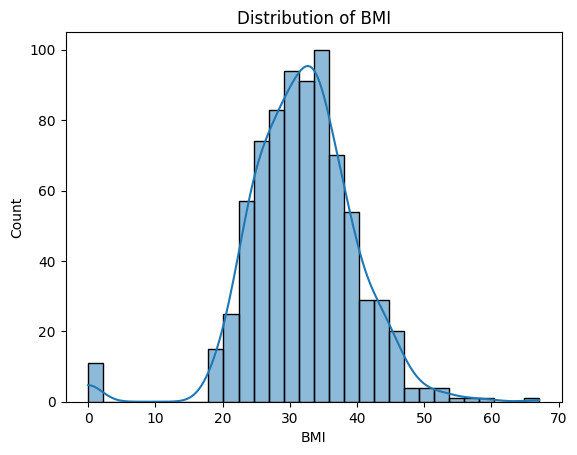

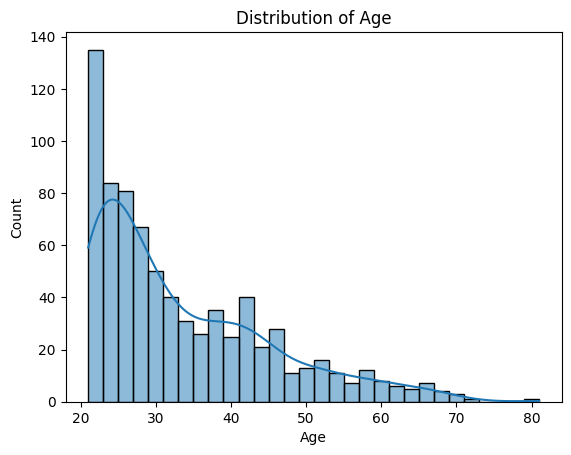

In [ ]:
# ==== Distribution of key features ====

important_cols = ['Glucose', 'BloodPressure', 'BMI', 'Age']

for col in important_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


In [6]:
# ===== Handle invalid zero values =====

columns_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_with_zero_invalid:
    zero_count = (df[col] == 0).sum()
    print(f"{col} has {zero_count} zeros")

    # استبدال الصفر بالقيمة المتوسطة median
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values after cleaning:\n", df.isnull().sum())


Glucose has 5 zeros
BloodPressure has 35 zeros
SkinThickness has 227 zeros
Insulin has 374 zeros
BMI has 11 zeros

Missing values after cleaning:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/tmp/ipython-input-85247430.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [7]:
# ===== Split Train/Test =====

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balance data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# ===== Train multiple ML models and evaluate (Logistic Regression) =====


from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


In [9]:
# ===== Train multiple ML models and evaluate (Random Forest) =====


from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [10]:
# ===== Train multiple ML models and evaluate (Support Vector Machine (SVM)) =====



from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


In [11]:
# ===== Train multiple ML models and evaluate (Metrix) =====


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

models = ['Logistic Regression', 'Random Forest', 'SVM']
preds = [y_pred_log, y_pred_rf, y_pred_svm]

for model, pred in zip(models, preds):
    print(f"--- {model} ---")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Precision:", precision_score(y_test, pred))
    print("Recall:", recall_score(y_test, pred))
    print("F1-score:", f1_score(y_test, pred))
    print("\n")


--- Logistic Regression ---
Accuracy: 0.7142857142857143
Precision: 0.5806451612903226
Recall: 0.6666666666666666
F1-score: 0.6206896551724138


--- Random Forest ---
Accuracy: 0.7467532467532467
Precision: 0.6271186440677966
Recall: 0.6851851851851852
F1-score: 0.6548672566371682


--- SVM ---
Accuracy: 0.7597402597402597
Precision: 0.639344262295082
Recall: 0.7222222222222222
F1-score: 0.6782608695652174




In [12]:
#مقارنة النتائج


results = pd.DataFrame({
    'Model': models,
    'Accuracy': [accuracy_score(y_test, y_pred_log),
                 accuracy_score(y_test, y_pred_rf),
                 accuracy_score(y_test, y_pred_svm)],
    'Precision': [precision_score(y_test, y_pred_log),
                  precision_score(y_test, y_pred_rf),
                  precision_score(y_test, y_pred_svm)],
    'Recall': [recall_score(y_test, y_pred_log),
               recall_score(y_test, y_pred_rf),
               recall_score(y_test, y_pred_svm)],
    'F1-score': [f1_score(y_test, y_pred_log),
                 f1_score(y_test, y_pred_rf),
                 f1_score(y_test, y_pred_svm)]
})

results


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.714286,0.580645,0.666667,0.620690
1,Random Forest,0.746753,0.627119,0.685185,0.654867
2,SVM,0.759740,0.639344,0.722222,0.678261


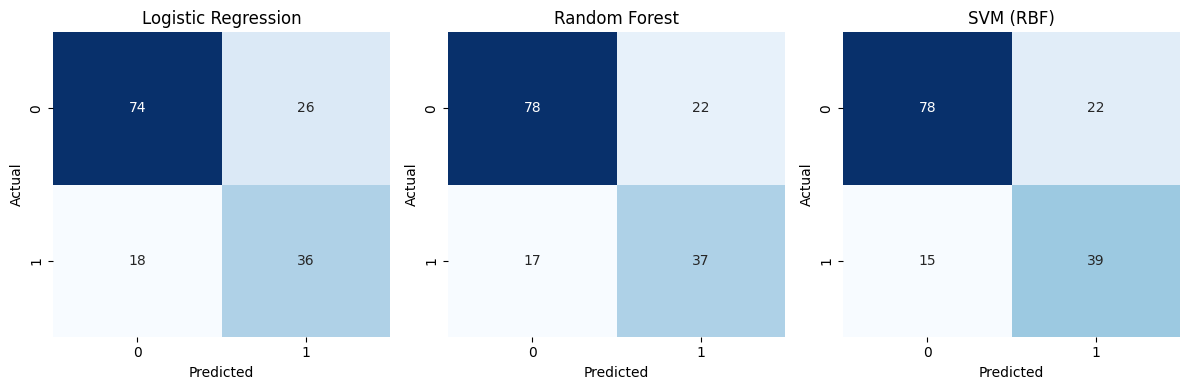

In [23]:
# ===== Confusion Matrix =====


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of predictions and model names
preds = [y_pred_log, y_pred_rf, y_pred_svm]
model_names = ['Logistic Regression', 'Random Forest', 'SVM (RBF)']

# Create subplots
plt.figure(figsize=(12, 4))

for i, (pred, name) in enumerate(zip(preds, model_names)):
    cm = confusion_matrix(y_test, pred)

    plt.subplot(1, 3, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300)  # Save image for Overleaf
plt.show()


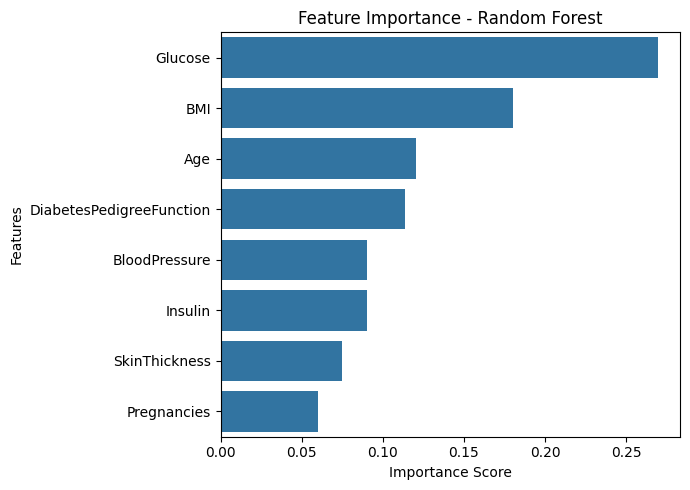

In [26]:
# Feature Importance (من Random Forest)


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(7,5))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()


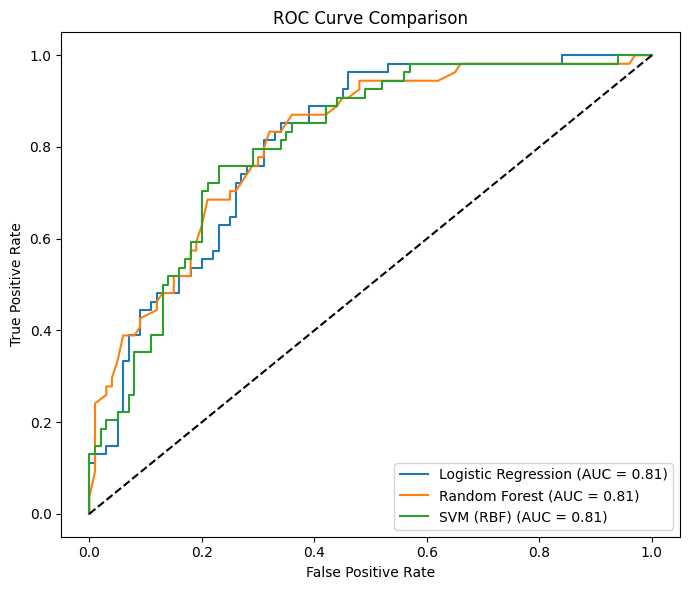

In [25]:
#ROC Curve (مهم في الـ Healthcare)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))

for name, model in zip(model_names, [log_model, rf_model, svm_model]):
    if name == "SVM (RBF)":
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300)
plt.show()



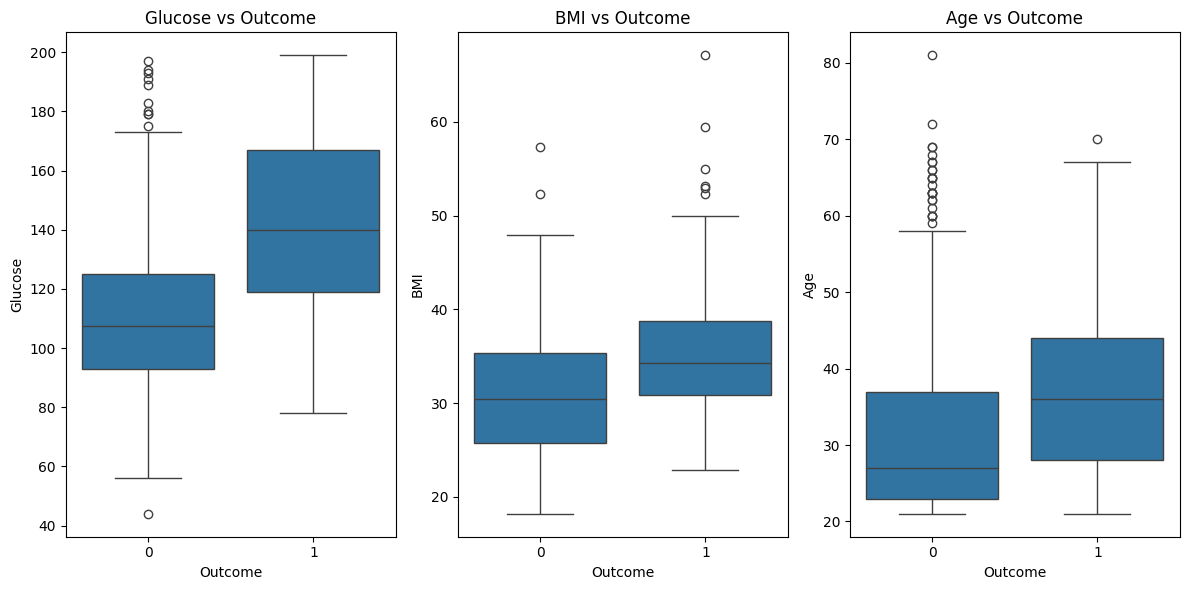

In [29]:
#Boxplot

import matplotlib.pyplot as plt
import seaborn as sns

features = ['Glucose', 'BMI', 'Age']

plt.figure(figsize=(12,6))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} vs Outcome')

plt.tight_layout()
plt.savefig('boxplots.png', dpi=300)
plt.show()


